In [7]:
import config
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
import time
import importlib


In [8]:
importlib.reload(config)
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
driver = webdriver.Chrome(f"{config.webDriverPath}", options=chrome_options)

driver.get("http://www.facebook.com")

email = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='email']")))
password = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input[name='pass']")))

email.clear()
password.clear()

email.send_keys(f"{config.username}")
password.send_keys(f"{config.password}")

button = WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[type='submit']"))).click()


In [27]:

photos_Url = [] # pour contenir la list des albums
images = [] # pour contenir la liste des liens des images dans tous les album
all_images = []
dir(config)
driver.get(f"{config.URL}/photos")
time.sleep(3)
photos_Url = driver.find_elements_by_tag_name('a')
# list(set(obj)) pour supprimer les élements redondantes d'une liste obj
photos_Url = list(set([i.get_attribute('href') for i in photos_Url  if i.get_attribute('href') is not None and i.get_attribute('href').startswith(f"{config.URL}/photo")]))


#recuperer la liste qui contient juste les lien des albums contenant les images
for photoPage in photos_Url:
    driver.get(photoPage)
    albums = [i.get_attribute('href') for i in driver.find_elements_by_tag_name('a') if i.get_attribute('href') is not None and i.get_attribute('href').startswith("https://www.facebook.com/media/set/?set")]
    if len(albums) > 0:
        # supprimer l'elemnt qui contient les albums puis les remplacer avec les lien des albums.
        photos_Url.remove(photoPage)
        photos_Url.extend(albums)   
        
    

['https://www.facebook.com/photo.php?fbid=2693922737551390&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2751914595085537&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1806226679654338&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1850993685177637&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2717290775214586&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2874702742806721&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1610850672525274&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2125789167698086&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1776030919340581&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo/?fbid=1850993685177637&set=a.15

In [29]:
        
for album in photos_Url:
    driver.get(album) # naviguer vers le lien
    time.sleep(5) # attente un peu
    imgs = driver.find_elements_by_tag_name("a")
    if imgs is not None:
        images = list(set([img.get_attribute('href') for img in imgs if img.get_attribute('href') is not None and img.get_attribute('href').startswith("https://www.facebook.com/photo")]))
        all_images.extend(images)


print(list(set(all_images)))
print(len(list(set(all_images))))


['https://www.facebook.com/photo.php?fbid=2693922737551390&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2751914595085537&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1806226679654338&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1850993685177637&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2717290775214586&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2874702742806721&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1610850672525274&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2125789167698086&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=1776030919340581&set=pb.100008010701084.-2207520000..&type=3', 'https://www.facebook.com/photo.php?fbid=2819002135043449&set=p

In [ ]:
all_images = list(set(all_images))
img_url = []

for img in all_images:
    driver.get(img)
    image = driver.find_elements_by_tag_name("img")
    if len(image) > 0:
        img_url.append(image[0].get_attribute('src'))
    

    

In [57]:
import os
import shutil    
    
path = os.getcwd()
path = os.path.join(path, "Facebook_Images")
if os.path.exists(path) and os.path.isdir(path):
    shutil.rmtree(path)
os.mkdir(path)

In [58]:
import wget

#download images
counter = 0
try:
    
    for image in img_url:
        save_as = os.path.join(path, str(counter) + '.jpg')
        print('')
        wget.download(image, save_as)
        counter += 1
except Exception  as e:
    print(str(e))


In [84]:
#The glob module finds all the pathnames matching a specified pattern according to the rules used by OS
import glob

f = open("train.txt", "w")
for file in glob.glob("C:\\Users\\ELHAJJOUT\\Scrapping\\Facebook_Images\\*.jpg"):
    f.write(file)
    f.write("\n")
f.close()


In [85]:
!F:\\darknet\\darknet-master\build\darknet\x64\darknet.exe detector test coco.data yolov4.cfg yolov4.weights -dont_show -ext_output < train.txt > result.txt

 CUDA-version: 11050 (11050), cuDNN: 8.2.0, GPU count: 1  
 OpenCV version: 4.5.5
 0 : compute_capability = 610, cudnn_half = 0, GPU: NVIDIA GeForce GTX 1060 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 route  8 2 	                           ->  304 x 304 x 128 
  10 conv

 129 route  54 		                           ->   76 x  76 x 256 
 130 conv    128       1 x 1/ 1     76 x  76 x 256 ->   76 x  76 x 128 0.379 BF
 131 route  130 128 	                           ->   76 x  76 x 256 
 132 conv    128       1 x 1/ 1     76 x  76 x 256 ->   76 x  76 x 128 0.379 BF
 133 conv    256       3 x 3/ 1     76 x  76 x 128 ->   76 x  76 x 256 3.407 BF
 134 conv    128       1 x 1/ 1     76 x  76 x 256 ->   76 x  76 x 128 0.379 BF
 135 conv    256       3 x 3/ 1     76 x  76 x 128 ->   76 x  76 x 256 3.407 BF
 136 conv    128       1 x 1/ 1     76 x  76 x 256 ->   76 x  76 x 128 0.379 BF
 137 conv    256       3 x 3/ 1     76 x  76 x 128 ->   76 x  76 x 256 3.407 BF
 138 conv    255       1 x 1/ 1     76 x  76 x 256 ->   76 x  76 x 255 0.754 BF
 139 yolo
[yolo] params: iou loss: ciou (4), iou_norm: 0.07, obj_norm: 1.00, cls_norm: 1.00, delta_norm: 1.00, scale_x_y: 1.20
 140 route  136 		                           ->   76 x  76 x 128 
 141 conv    256       3 x 3/ 2  

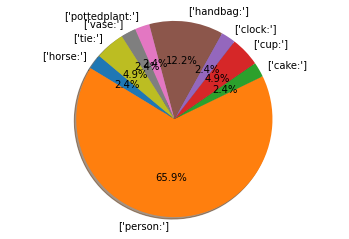

In [34]:
import matplotlib.pyplot as plt

# regular expression module
import re

var1=list()
var2=list()
numobj=list()
numobj0=list()

#extracting data, get classnames that are present in our file
file = open ("result.txt", "rt")
for line in file:
    i = re.findall(r'^[a-z]*:', line)
    var1.append(i)
file.close()



#remove the empty blanks
for x in var1:
    if x!=[]:
       
        var2.append(x)


#remove the duplicated item
objdetec = []
for item in var2:
    if item not in objdetec:
        objdetec.append(item)
        
#count every object 
for el in objdetec:
    cout = 0
    for el1 in var2:
        if el1 == el:
            cout+=1
    numobj0.append(cout)


# Plot
plt.pie(numobj0, labels=objdetec,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()